In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import visualkeras

from tensorflow.keras.datasets   import mnist
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras.callbacks  import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics             import confusion_matrix,classification_report
from sklearn.model_selection     import train_test_split

# Table of Content
* 0-) Data Reading
  * 0.1-) Data Analysis
  * 0.2-) Data Visualization
  * 0.3-) Data Preprocessig
  * 0.4-) Some Functions to use late
* 1-) Modelling - model_1
* 2-) Modelling - model_2
* 3-) Modelling - model_3
* 4-) Extra Comparisons (for questions)

# 0-) Data Reading

## 0.1-) Data Analysis

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [3]:
#Lengths of data
print("x_train: %d" % len(x_train))
print("y_train: %d" % len(y_train))
print("x_val: %d" % len(x_val))
print("y_val: %d" % len(y_val))
print("x_test: %d" % len(x_test))
print("y_test: %d" % len(y_test))

x_train: 54000
y_train: 54000
x_val: 6000
y_val: 6000
x_test: 10000
y_test: 10000


In [4]:
#unique outputs:
print("Unique outputs: " , np.unique(y_train))

Unique outputs:  [0 1 2 3 4 5 6 7 8 9]


In [5]:
#Shapes of data
print("x_train: "   + str(x_train.shape))
print("y_train: " + str(y_train.shape))
print("x_val: "   + str(x_val.shape))
print("y_val: "   + str(y_val.shape))
print("x_test: "  + str(x_test.shape))
print("y_test: "  + str(y_test.shape))

x_train: (54000, 28, 28)
y_train: (54000,)
x_val: (6000, 28, 28)
y_val: (6000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## 0.2-) Data Visualization

In [6]:
label_names_list = [str(i) for i in range(10)]

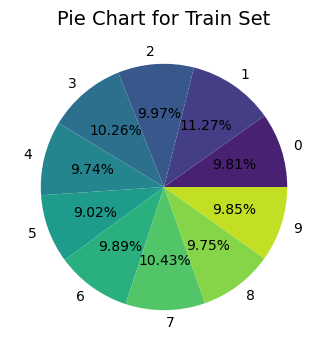

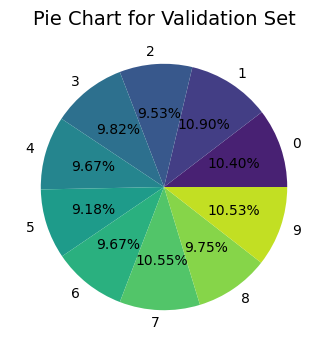

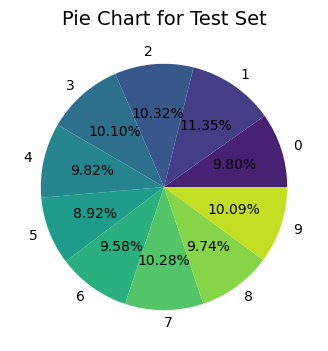

In [7]:
def plot_pie_chart(labels, title_name):
    _, counts = np.unique(labels, return_counts=True)           #Find unique labels(integers) and thier frequencies
    plt.figure(figsize=(4, 4))
    plt.pie(counts, labels=label_names_list, autopct='%1.2f%%', colors=sns.color_palette("viridis", len(counts)))
    plt.title(f"Pie Chart for {title_name}", fontsize=14)
    plt.show()

plot_pie_chart(labels          = y_train, 
               title_name      = "Train Set")

plot_pie_chart(labels          = y_val, 
               title_name      = "Validation Set")

plot_pie_chart(labels          = y_test, 
               title_name      = "Test Set")

In [8]:
def visualize_img(title, data, labels, num):
    print("----------"+title+"----------")
    plt.figure(figsize=(5,5))
    for n in range(num):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(data[n], cmap="gray")
        plt.axis("off")
        ax.set_title(f"Label: {labels[n]}")
    plt.tight_layout()
    plt.show()

----------Train Set----------


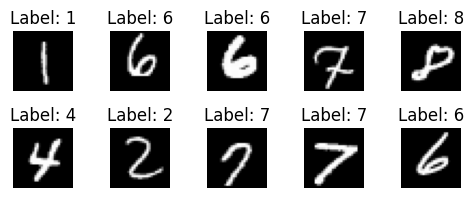

----------Validation Set----------


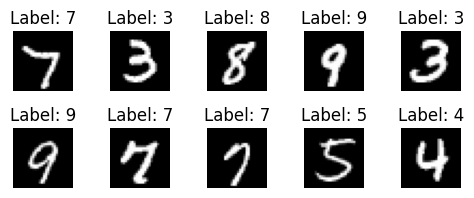

----------Test Set----------


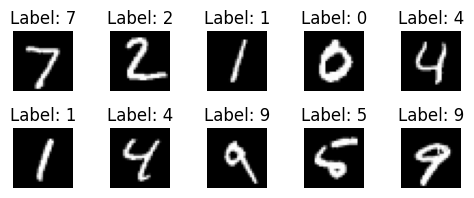

In [9]:
visualize_img("Train Set",x_train,y_train,10)
visualize_img("Validation Set",x_val,y_val,10)
visualize_img("Test Set",x_test,y_test,10)

## 0.3-)Data Preprocessing

In [10]:
def print_array_example(data):    
    for i in range(5):
        print(data[i])
    print("\n")

In [11]:
#Before One-Hot Encoding
print_array_example(y_train)
print_array_example(y_val)
print_array_example(y_test)

1
6
6
7
8


7
3
8
9
3


7
2
1
0
4




In [12]:
#One-Hot Encoding
num_of_classes = len(np.unique(y_train))
print("num_of_classes: %d" % num_of_classes)
y_train = to_categorical(y_train, num_of_classes)
y_val   = to_categorical(y_val  , num_of_classes)
y_test  = to_categorical(y_test , num_of_classes)

num_of_classes: 10


In [13]:
def print_array_example(data):
    for i in range(5):
        print(data[i], " - ", np.argmax(data[i]))
    print("\n")

In [14]:
#After One-Hot Encoding
print_array_example(y_train)
print_array_example(y_val)
print_array_example(y_test)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]  -  1
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]  -  6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]  -  6
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]  -  7
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]  -  8


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]  -  7
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]  -  3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]  -  8
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]  -  9
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]  -  3


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]  -  7
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]  -  2
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]  -  1
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  -  0
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]  -  4




## 0.4-) Some functions to use later

In [15]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

In [16]:
def print_classification_report(model):
    y_pred = model.predict(x_test)
    y_pred_labels = np.argmax(y_pred, axis=1)  # one-hot --> class
    y_true_labels = np.argmax(y_test, axis=1)  # one-hot --> class

    print(classification_report(y_true_labels, y_pred_labels, target_names=label_names_list, digits=4))

In [17]:
def print_confusion_matrix(title, model):
    # Real and Predicted Labels
    y_true_labels = np.argmax(y_test, axis=1)
    y_pred_labels = np.argmax(model.predict(x_test), axis=1)
    
    # Confusion matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    
    # Visualization with heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names_list, yticklabels=label_names_list)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - '+title)
    plt.show()

# 1-) Modelling - model_1

In [18]:
model_1 = tf.keras.Sequential([
    Flatten(input_shape=(28,28), name="Flatten"), #this layer will turn 28x28 matrix into 1 dimensional array with the size of 28*28=784 
    Dense(units=64, activation="relu",name="Dense_layer1"),
    Dense(units=num_of_classes, activation="softmax", name="output_layer")
    ])

c:\Users\Giray\Desktop\deep learning lecture assignments\tensorflow_env\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


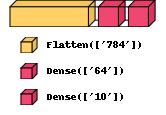

In [19]:
#Visualization of the layers:
visualkeras.layered_view(model_1, legend=True, show_dimension=True)

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense_layer1 (Dense)        (None, 64)                50240     
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [21]:
learning_rate = 0.0015
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [22]:
batch_size = 32  # mini-batch with 32 examples
epochs = 30
history_model_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_val, y_val))

Epoch 1/30
1688/1688 [==============================] - 8s 5ms/step - loss: 2.2815 - precision: 0.8875 - recall: 0.7901 - accuracy: 0.8339 - val_loss: 0.7736 - val_precision: 0.9411 - val_recall: 0.8728 - val_accuracy: 0.8968
Epoch 2/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.6495 - precision: 0.9421 - recall: 0.8795 - accuracy: 0.9015 - val_loss: 0.6566 - val_precision: 0.9498 - val_recall: 0.8825 - val_accuracy: 0.9012
Epoch 3/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5746 - precision: 0.9478 - recall: 0.8989 - accuracy: 0.9134 - val_loss: 0.5792 - val_precision: 0.9485 - val_recall: 0.9117 - val_accuracy: 0.9217
Epoch 4/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5425 - precision: 0.9545 - recall: 0.9111 - accuracy: 0.9249 - val_loss: 0.6349 - val_precision: 0.9511 - val_recall: 0.9082 - val_accuracy: 0.9212
Epoch 5/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5435 - precision: 

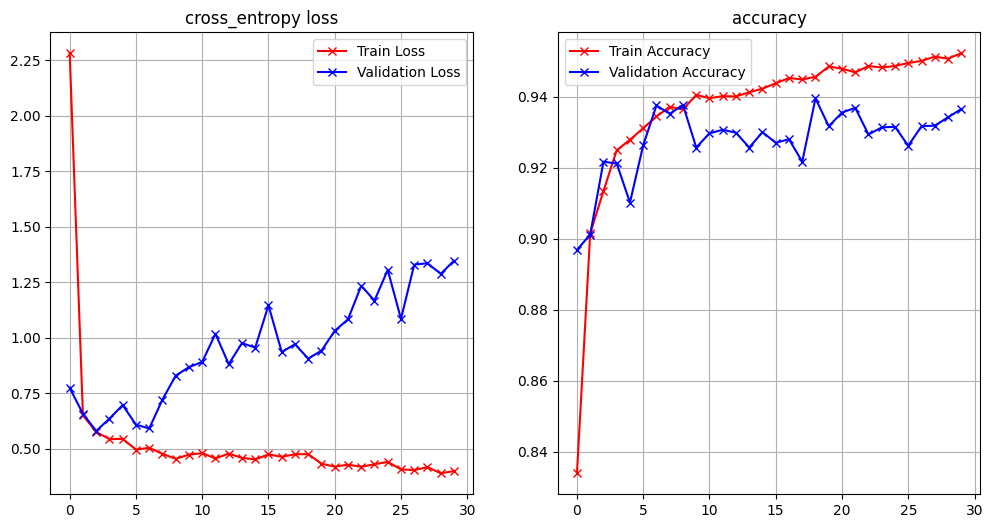

In [23]:
plot_loss_accuracy(history_model_1)

In [24]:
#control the order of metrics
model_1.metrics_names

['loss', 'precision', 'recall', 'accuracy']

In [25]:
test_loss, test_precision, test_recall, test_accuracy = model_1.evaluate(x_test, y_test, verbose=False)
print("\nTest Accuracy: %.6f%%" % (100.0*test_accuracy))
print("\nTest Loss: %.6f%%" % (100.0*test_loss))
print("\nTest Precision: %.6f%%" % (100.0*test_precision))
print("\nTest Recall: %.6f%%" % (100.0*test_recall))


Test Accuracy: 93.239999%

Test Loss: 169.237769%

Test Precision: 96.210527%

Test Recall: 91.399997%


In [26]:
print_classification_report(model=model_1)

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0     0.9813    0.9653    0.9733       980
           1     0.9882    0.9612    0.9745      1135
           2     0.9648    0.9302    0.9472      1032
           3     0.9614    0.8871    0.9228      1010
           4     0.9549    0.9277    0.9411       982
           5     0.9514    0.9215    0.9362       892
           6     0.9639    0.9478    0.9558       958
           7     0.9680    0.9416    0.9546      1028
           8     0.7083    0.9600    0.8152       974
           9     0.9589    0.8791    0.9173      1009

    accuracy                         0.9324     10000
   macro avg     0.9401    0.9322    0.9338     10000
weighted avg     0.9412    0.9324    0.9345     10000



313/313 [==============================] - 0s 1ms/step


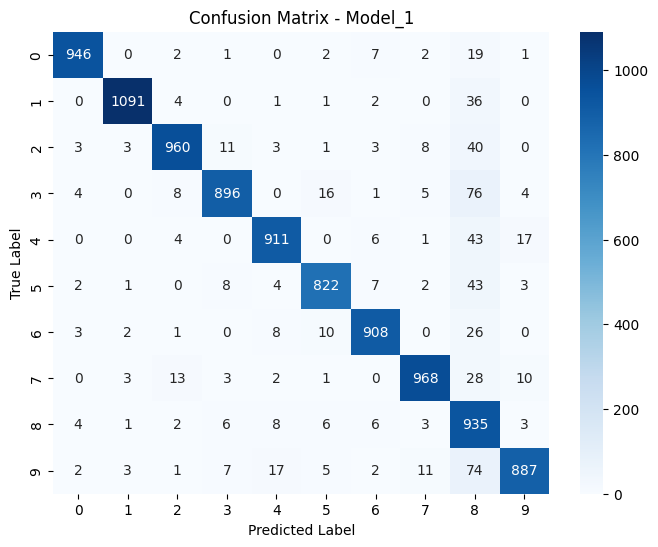

In [27]:
print_confusion_matrix(title="Model_1",
                       model=model_1)

# 2-) Modelling - model_2

In [28]:
model_2 = tf.keras.Sequential([
    Flatten(input_shape=(28,28), name="Flatten"), #this layer will turn 28x28 matrix into 1 dimensional array with the size of 28*28=784 
    Dense(units=64, activation="relu",name="Dense_layer1"),
    Dropout(0.25,name="Dropout1"), # dropout 0.25
    Dense(units=64, activation="relu",name="Dense_layer2"),
    Dropout(0.25,name="Dropout2"), # dropout 0.25
    Dense(units=num_of_classes, activation="softmax", name="output_layer")
    ])

c:\Users\Giray\Desktop\deep learning lecture assignments\tensorflow_env\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


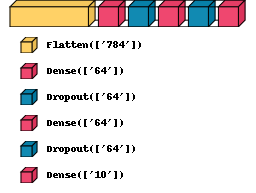

In [29]:
#Visualization of the layers:
visualkeras.layered_view(model_2, legend=True, show_dimension=True)

In [47]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense_layer1 (Dense)        (None, 64)                50240     
                                                                 
 Dropout1 (Dropout)          (None, 64)                0         
                                                                 
 Dense_layer2 (Dense)        (None, 64)                4160      
                                                                 
 Dropout2 (Dropout)          (None, 64)                0         
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trai

In [48]:
learning_rate = 0.002
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [49]:
batch_size = 32  # mini-batch with 32 examples
epochs = 25
history_model_2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_val, y_val))

Epoch 1/25
1688/1688 [==============================] - 10s 5ms/step - loss: 1.0345 - precision_3: 0.8688 - recall_3: 0.5233 - accuracy: 0.6472 - val_loss: 0.6892 - val_precision_3: 0.9136 - val_recall_3: 0.6645 - val_accuracy: 0.7775
Epoch 2/25
1688/1688 [==============================] - 9s 5ms/step - loss: 1.1142 - precision_3: 0.8917 - recall_3: 0.4944 - accuracy: 0.6140 - val_loss: 0.7787 - val_precision_3: 0.9386 - val_recall_3: 0.6143 - val_accuracy: 0.7325
Epoch 3/25
1688/1688 [==============================] - 9s 5ms/step - loss: 1.1340 - precision_3: 0.9097 - recall_3: 0.4885 - accuracy: 0.6033 - val_loss: 0.7809 - val_precision_3: 0.9501 - val_recall_3: 0.6222 - val_accuracy: 0.7255
Epoch 4/25
1688/1688 [==============================] - 8s 5ms/step - loss: 1.1559 - precision_3: 0.9166 - recall_3: 0.4859 - accuracy: 0.6008 - val_loss: 0.8229 - val_precision_3: 0.9493 - val_recall_3: 0.6055 - val_accuracy: 0.7290
Epoch 5/25
1688/1688 [==============================] - 9s 5ms/

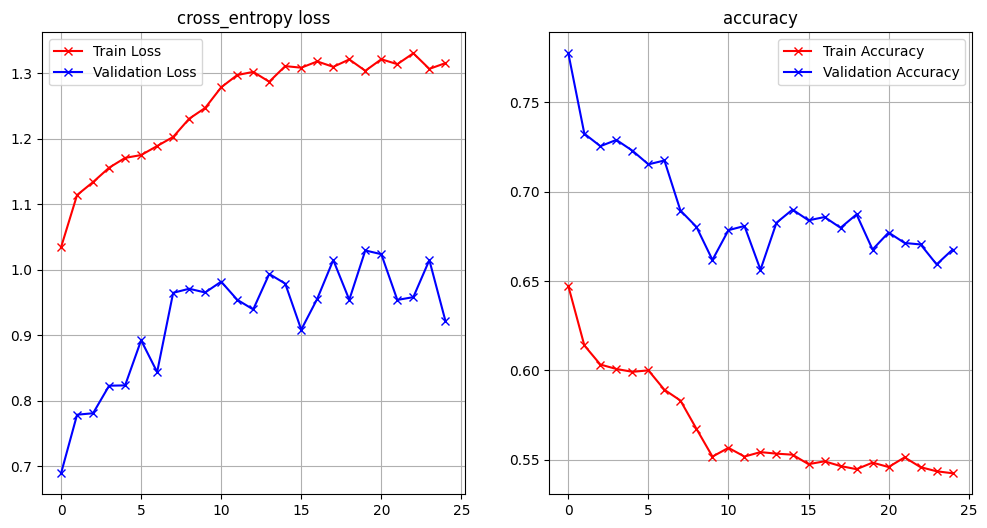

In [50]:
plot_loss_accuracy(history_model_2)

In [51]:
test_loss, test_precision, test_recall, test_accuracy = model_2.evaluate(x_test, y_test, verbose=False)
print("\nTest Accuracy: %.6f%%" % (100.0*test_accuracy))
print("\nTest Loss: %.6f%%" % (100.0*test_loss))
print("\nTest Precision: %.6f%%" % (100.0*test_precision))
print("\nTest Recall: %.6f%%" % (100.0*test_recall))


Test Accuracy: 67.559999%

Test Loss: 93.866336%

Test Precision: 91.086209%

Test Recall: 56.099999%


In [52]:
print_classification_report(model=model_2)

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0     0.9645    0.9704    0.9674       980
           1     0.9734    0.9665    0.9699      1135
           2     0.9728    0.8314    0.8966      1032
           3     0.7128    0.8574    0.7784      1010
           4     0.2771    0.9776    0.4318       982
           5     0.6356    0.3363    0.4399       892
           6     0.9522    0.8935    0.9219       958
           7     0.9108    0.8444    0.8763      1028
           8     0.0000    0.0000    0.0000       974
           9     0.0000    0.0000    0.0000      1009

    accuracy                         0.6756     10000
   macro avg     0.6399    0.6678    0.6282     10000
weighted avg     0.6461    0.6756    0.6361     10000



313/313 [==============================] - 0s 1ms/step


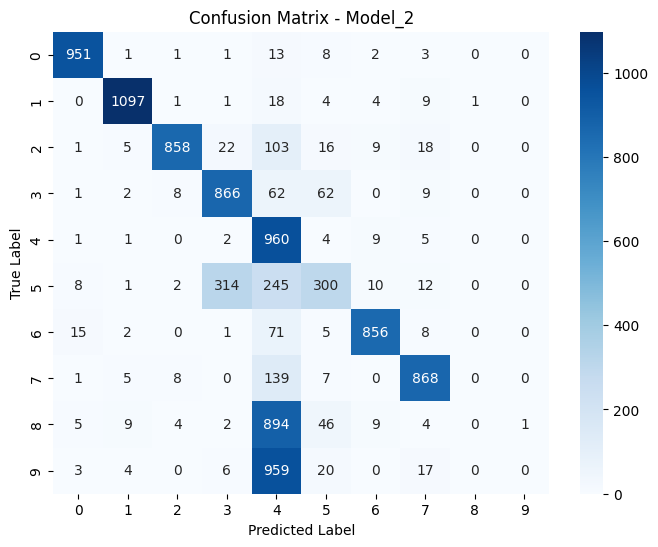

In [53]:
print_confusion_matrix(title="Model_2",
                       model=model_2)

# 3-) Modelling - model_3

In [37]:
model_3 = tf.keras.Sequential([
    Flatten(input_shape=(28,28), name="Flatten"), #this layer will turn 28x28 matrix into 1 dimensional array with the size of 28*28=784 
    Dense(units=256, activation="relu",name="Dense_layer1"),
    Dropout(0.1,name="Dropout1"), # dropout 0.1
    Dense(units=128, activation="relu",name="Dense_layer2"),
    Dropout(0.1,name="Dropout2"), # dropout 0.1
    Dense(units=64, activation="relu",name="Dense_layer3"),
    Dropout(0.1,name="Dropout3"), # dropout 0.1
    Dense(units=num_of_classes, activation="softmax", name="output_layer")
    ])

c:\Users\Giray\Desktop\deep learning lecture assignments\tensorflow_env\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


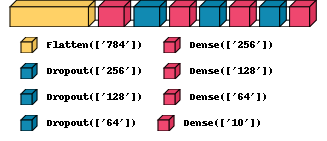

In [38]:
#Visualization of the layers:
visualkeras.layered_view(model_3, legend=True, show_dimension=True)

In [39]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense_layer1 (Dense)        (None, 256)               200960    
                                                                 
 Dropout1 (Dropout)          (None, 256)               0         
                                                                 
 Dense_layer2 (Dense)        (None, 128)               32896     
                                                                 
 Dropout2 (Dropout)          (None, 128)               0         
                                                                 
 Dense_layer3 (Dense)        (None, 64)                8256      
                                                                 
 Dropout3 (Dropout)          (None, 64)               

In [40]:
callback = [EarlyStopping(monitor  = "val_loss",        #Target Metric
                           patience = 10,               #Control every 15 epoch.
                           verbose  = 1,                #Show Information
                           mode     = "min",            #Stop, if val_loss cannot decrease.
                           restore_best_weights=True),  #Restore best weights that minimizes val_loss
            
            ReduceLROnPlateau(monitor='val_loss', #Target Metric 
                              factor=0.5,         #Reduce LR by multplying 0.5
                              patience=3,         #Wait for 3 epoch to apply reduction
                              min_lr=0.00001)]    #Minimum LR possible

In [41]:
learning_rate = 0.0005
model_3.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=learning_rate),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [42]:
batch_size = 32  # mini-batch with 32 examples
epochs = 50
history_model_3 = model_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=callback,
    validation_data=(x_val, y_val))

Epoch 1/50
1688/1688 [==============================] - 10s 6ms/step - loss: 2.1173 - precision_2: 0.7894 - recall_2: 0.7530 - accuracy: 0.7691 - val_loss: 0.3165 - val_precision_2: 0.9424 - val_recall_2: 0.8892 - val_accuracy: 0.9127 - lr: 5.0000e-04
Epoch 2/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4153 - precision_2: 0.9193 - recall_2: 0.8648 - accuracy: 0.8888 - val_loss: 0.2285 - val_precision_2: 0.9636 - val_recall_2: 0.9170 - val_accuracy: 0.9373 - lr: 5.0000e-04
Epoch 3/50
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3026 - precision_2: 0.9416 - recall_2: 0.8958 - accuracy: 0.9162 - val_loss: 0.1853 - val_precision_2: 0.9677 - val_recall_2: 0.9283 - val_accuracy: 0.9475 - lr: 5.0000e-04
Epoch 4/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2343 - precision_2: 0.9558 - recall_2: 0.9188 - accuracy: 0.9356 - val_loss: 0.1557 - val_precision_2: 0.9723 - val_recall_2: 0.9470 - val_accuracy: 0.9583 - lr: 5.000

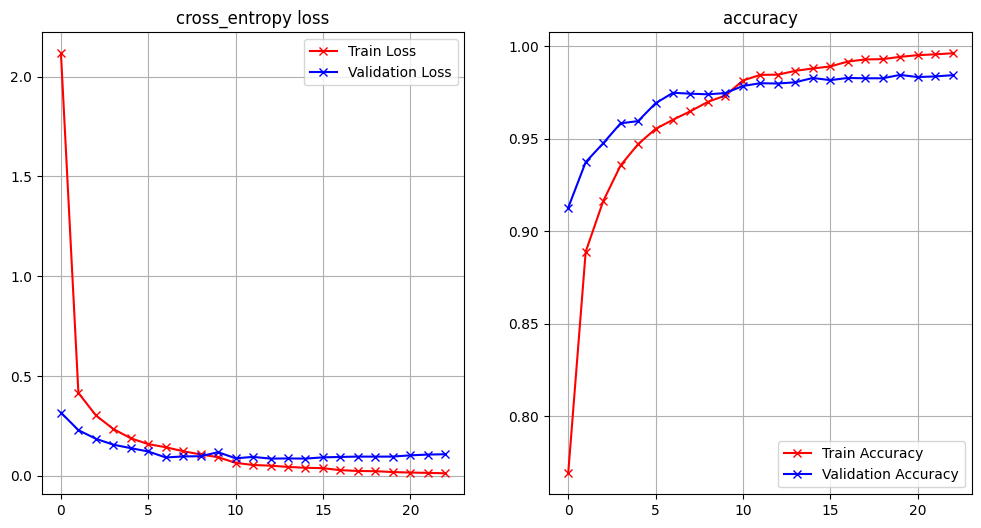

In [43]:
plot_loss_accuracy(history_model_3)

In [44]:
test_loss, test_precision, test_recall, test_accuracy = model_3.evaluate(x_test, y_test, verbose=False)
print("\nTest Accuracy: %.6f%%" % (100.0*test_accuracy))
print("\nTest Loss: %.6f%%" % (100.0*test_loss))
print("\nTest Precision: %.6f%%" % (100.0*test_precision))
print("\nTest Recall: %.6f%%" % (100.0*test_recall))


Test Accuracy: 97.880000%

Test Loss: 10.329329%

Test Precision: 98.178524%

Test Recall: 97.560000%


In [45]:
print_classification_report(model=model_3)

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0     0.9739    0.9908    0.9823       980
           1     0.9895    0.9921    0.9908      1135
           2     0.9816    0.9816    0.9816      1032
           3     0.9707    0.9842    0.9774      1010
           4     0.9787    0.9847    0.9817       982
           5     0.9677    0.9742    0.9709       892
           6     0.9842    0.9749    0.9795       958
           7     0.9739    0.9805    0.9772      1028
           8     0.9772    0.9692    0.9732       974
           9     0.9887    0.9534    0.9707      1009

    accuracy                         0.9788     10000
   macro avg     0.9786    0.9786    0.9785     10000
weighted avg     0.9789    0.9788    0.9788     10000



313/313 [==============================] - 0s 1ms/step


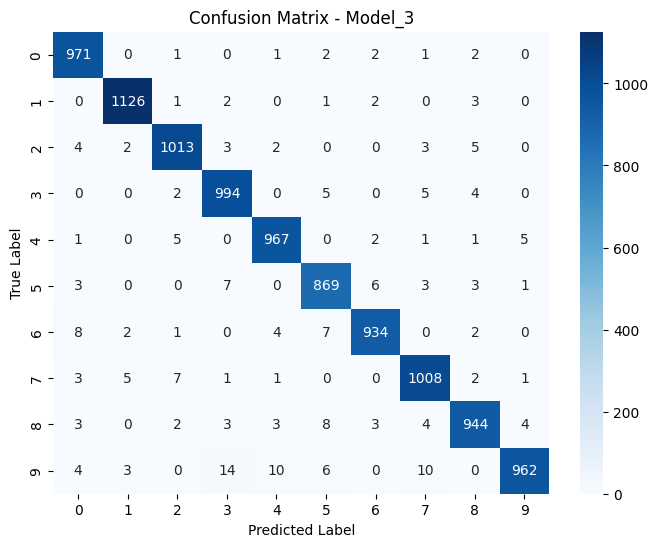

In [46]:
print_confusion_matrix(title="Model_3",
                       model=model_3)

# 4-) Extra Comparisons

* Comparing loss and accuracy for test and train

In [68]:
def evaluate_model(model,x,y,title):
    print("============ ", title, " ============")
    loss, precision, recall, accuracy = model.evaluate(x, y, verbose=False)
    print("\nAccuracy: %.6f%%" % (100.0*accuracy))
    print("Loss    : %.6f%%" % (100.0*loss))

In [69]:
print("model_1")
evaluate_model(model=model_1,
               x=x_train,
               y=y_train,
               title="Train Set")
evaluate_model(model=model_1,
               x=x_test,
               y=y_test,
               title="Test Set")

model_1
============  Train Set  ============

Accuracy: 95.570368%
Loss    : 30.054542%
============  Test Set  ============

Accuracy: 93.239999%
Loss    : 169.237769%


In [70]:
print("model_2")
evaluate_model(model=model_2,
               x=x_train,
               y=y_train,
               title="Train Set")
evaluate_model(model=model_2,
               x=x_test,
               y=y_test,
               title="Test Set")

model_2
============  Train Set  ============

Accuracy: 68.005556%
Loss    : 88.636440%
============  Test Set  ============

Accuracy: 67.559999%
Loss    : 93.866336%


In [71]:
print("model_3")
evaluate_model(model=model_3,
               x=x_train,
               y=y_train,
               title="Train Set")
evaluate_model(model=model_3,
               x=x_test,
               y=y_test,
               title="Test Set")

model_3
============  Train Set  ============

Accuracy: 99.353701%
Loss    : 2.063246%
============  Test Set  ============

Accuracy: 97.880000%
Loss    : 10.329329%
